In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

In [ ]:
networks = ['deepvo', 'deepvo_se3']
train_or_val = ['train', 'validation']
losses = ['loss','rotation_loss','traslation_loss']

for i,network in enumerate(networks):
    for j,set in enumerate(train_or_val):
        for k,loss in enumerate(losses):
            file = os.path.join(os.getcwd(),'../saved/logs', network, 'original_paper', 
                                set + '_'+ 'epoch' + '_' + loss + '.csv')
            df = pd.read_csv(file) # each file has 3 columns: Step, Wall time, Value
            df = df.drop(columns=['Wall time','Step'])
            df = df.rename(columns={'Value': network+ '_' + set + '_' + loss})
            if i==0 and j==0 and k==0:
                df_all = df
            else:
                df_all = pd.merge(df_all, df, left_index=True, right_index=True) # merge on index
df_all

In [144]:
def plot_loss(df_all, networks, train_or_val, losses):
    colors = sns.color_palette("Spectral", len(networks)*10*len(train_or_val)*len(losses))
    fig, ax = plt.subplots(figsize=(10,5))
    y_pos = df_all.index.values

    for n,network in enumerate(networks):
        for s,set in enumerate(train_or_val):
            for loss in losses:
                # Smoothing
                smooth_array = gaussian_filter1d(df_all[network+ '_' + set + '_' + loss], sigma=2)
                # Error formating
                upper_err = gaussian_filter1d(df_all[network+ '_' + set + '_' + loss]+df_all[network+ '_' + set + '_' + loss].rolling(window=5, min_periods=0).std().fillna(0), sigma=5)
                lower_err = gaussian_filter1d(df_all[network+ '_' + set + '_' + loss]-df_all[network+ '_' + set + '_' + loss].rolling(window=5, min_periods=0).std().fillna(0) , sigma=5)

                # ax.plot(y_pos, df_all[network+ '_' + set + '_' + loss], '--', linewidth=0.7, alpha=0.45)
                ax.plot(y_pos, smooth_array, label=network+ '_' + set + '_' + loss, color = colors[n*10+s*4])
                ax.fill_between(y_pos, upper_err, lower_err, alpha=0.2,color = colors[n*10+s*4])
                # sns.lineplot(data=df_all, x=y_pos, y=network+ '_' + set + '_' + loss, hue=set)

    plt.legend(loc="upper right")
    plt.show()


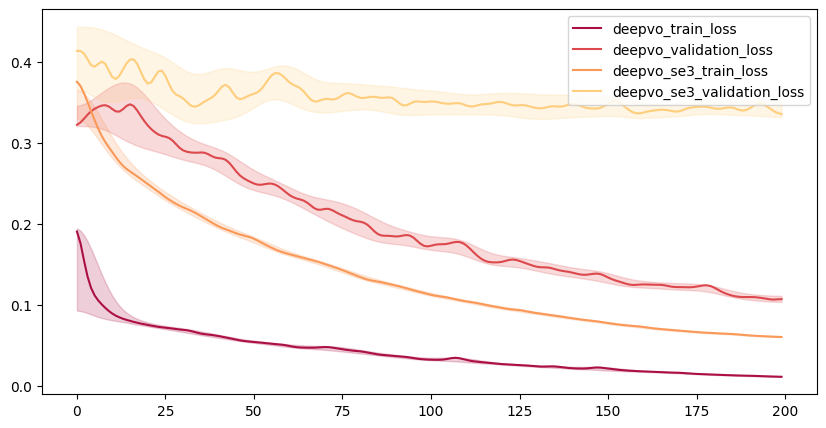

In [146]:
networks = ['deepvo', 'deepvo_se3']
train_or_val = ['train','validation']
losses = ['loss']
plot_loss(df_all, networks, train_or_val, losses)

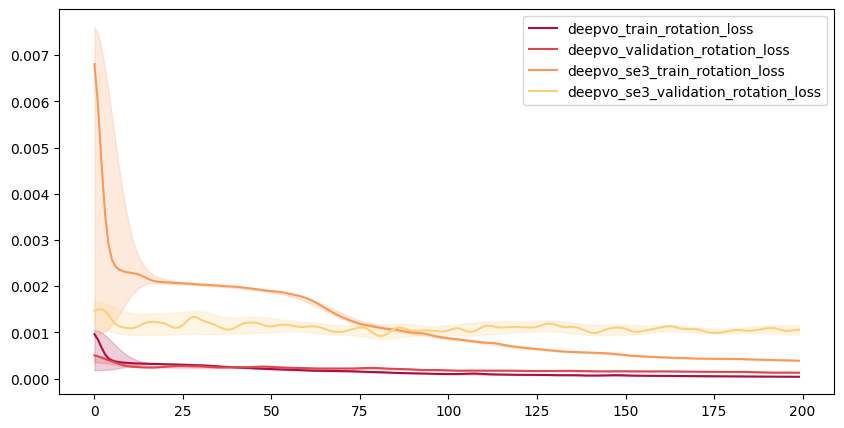

In [147]:
networks = ['deepvo', 'deepvo_se3']
train_or_val = ['train','validation']
losses = ['rotation_loss']
plot_loss(df_all, networks, train_or_val, losses)

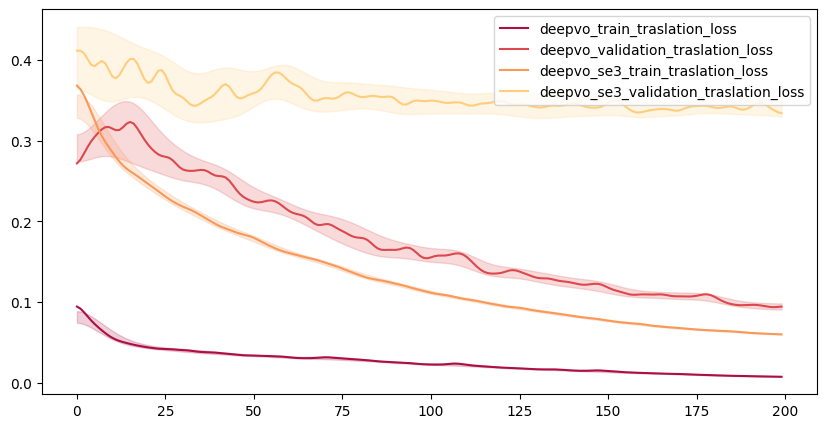

In [148]:
networks = ['deepvo', 'deepvo_se3']
train_or_val = ['train','validation']
losses = ['traslation_loss']
plot_loss(df_all, networks, train_or_val, losses)

In [158]:
# check multiplicative factor between trans and rot loss
(df_all['deepvo_train_traslation_loss'].mean()/df_all['deepvo_train_rotation_loss'].mean())

171.822557918809